In [16]:
from qiskit_aer import Aer
from qiskit import * 
from qiskit.visualization import * 
import matplotlib.pyplot as plt

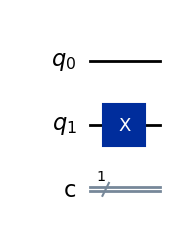

In [17]:
# Ініціалізація кубітів
qc_deutsch = QuantumCircuit(2, 1)
qc_deutsch.x(1)
qc_deutsch.draw("mpl")

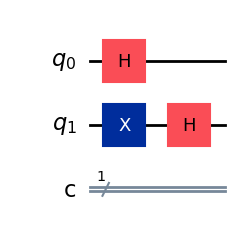

In [18]:
# Створення суперпозиції
qc_deutsch.h([0, 1])
qc_deutsch.draw("mpl")

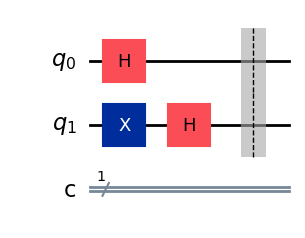

In [19]:
# Застосування oracle
def twobit_function(case: int):
    qc = QuantumCircuit(2)
    
    if case == 0:
        # f(x) = 0 
        pass

    elif case == 1:
        # f(x) = x 
        qc.cx(0, 1)

    elif case == 2:
        # f(x) = x ⊕ 1 
        qc.cx(0, 1)
        qc.x(1)

    elif case == 3:
        # f(x) = 1 
        qc.x(1)

    return qc

    
qc_deutsch.barrier()
oracle = twobit_function(0) #0,1,2,3
qc_deutsch.compose(oracle, inplace=True)
qc_deutsch.draw("mpl")

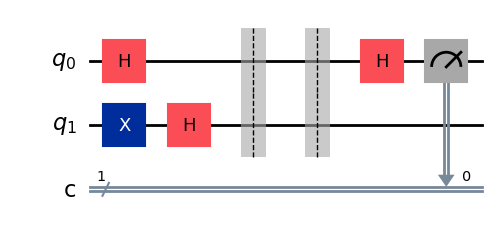

In [20]:
qc_deutsch.barrier()
qc_deutsch.h(0)
qc_deutsch.measure(0, 0)
qc_deutsch.draw("mpl")

In [21]:
# створюємо симулятор
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_deutsch, shots=1024).result()
counts = result.get_counts()
print("Результати вимірювання:", counts)


if "1" in counts:
    print("Функція є ЗБАЛАНСОВАНОЮ")
else:
    print("Функція є ПОСТІЙНОЮ")


Результати вимірювання: {'0': 1024}
Функція є ПОСТІЙНОЮ


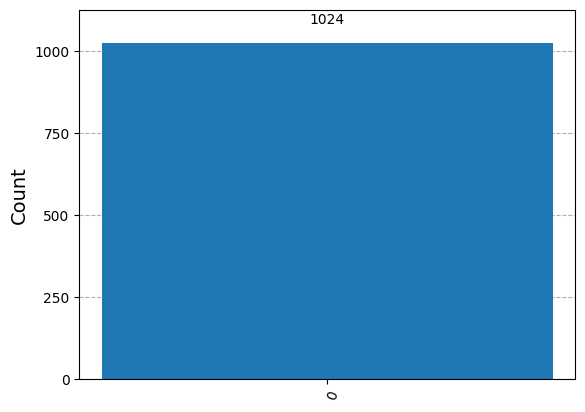

In [22]:
plot_histogram(counts)